<a href="https://colab.research.google.com/github/jscuteri/stock-market-analysis-machine-learning/blob/main/Finished%20Notebooks/%20XLK_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

     |████████████████████████████████| 63 kB 845 kB/s 
     |████████████████████████████████| 6.4 MB 23.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import math 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import yfinance as yf 
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
# define the ticker you will use
xlb = yf.Ticker('XLB')
xle= yf.Ticker('XLE')
xlf= yf.Ticker('XLF')
xli= yf.Ticker('XLI')
xlk= yf.Ticker('XLK')
xlp= yf.Ticker('XLP')
xlu= yf.Ticker('XLU')
xlv=yf.Ticker('XLV')
xly= yf.Ticker('XLY')
#Display stock information, it will give you a summary description of the ticker
# xlb.info

In [ ]:
## Get SP&500 Sector Data


##XLB Materials DF
xlb_history= xlb.history(period="MAX")

xlb_df=pd.DataFrame(xlb_history)

xlb_df= xlb_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
xlb_df= xlb_df.rename(columns={'Open': 'XLB_Open',
                        'Close':'XLB_Close',
                        'Volume':'XLB_Volume'})
# xlb_df

### XLE data 
xle_history= xle.history(period="MAX")

xle_df= pd.DataFrame(xle_history)

xle_df = xle_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
xle_df= xle_df.rename(columns={'Open': 'XLE_Open',
                        'Close':'XLE_Close',
                        'Volume':'XLE_Volume'})

## XLF Data Finance
xlf_history= xlf.history(period="MAX")

xlf_df= pd.DataFrame(xlf_history)

xlf_df = xlf_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
xlf_df= xlf_df.rename(columns={'Open': 'XLF_Open',
                        'Close':'XLF_Close',
                        'Volume':'XLF_Volume'})

## XLI Data Finance
xli_history= xli.history(period="MAX")

xli_df= pd.DataFrame(xli_history)

xli_df = xli_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
xli_df= xli_df.rename(columns={'Open': 'XLI_Open',
                        'Close':'XLI_Close',
                        'Volume':'XLI_Volume'})

## XLK Data Finance
xlk_history= xlk.history(period="MAX")

xlk_df= pd.DataFrame(xlk_history)

xlk_df = xlk_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
xlk_df= xlk_df.rename(columns={'Open': 'XLK_Open',
                        'Close':'XLK_Close',
                        'Volume':'XLK_Volume'})
## XLP Data Finance
xlp_history= xlp.history(period="MAX")

xlp_df= pd.DataFrame(xlp_history)

xlp_df = xlp_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
xlp_df= xlp_df.rename(columns={'Open': 'XLP_Open',
                        'Close':'XLP_Close',
                        'Volume':'XLP_Volume'})

## XLU Data Finance
xlu_history= xlu.history(period="MAX")

xlu_df= pd.DataFrame(xlu_history)

xlu_df = xlu_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
xlu_df= xlu_df.rename(columns={'Open': 'XLU_Open',
                        'Close':'XLU_Close',
                        'Volume':'XLU_Volume'})
## XLV Data Finance
xlv_history= xlv.history(period="MAX")

xlv_df= pd.DataFrame(xlv_history)

xlv_df = xlv_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
xlv_df= xlv_df.rename(columns={'Open': 'XLV_Open',
                        'Close':'XLV_Close',
                        'Volume':'XLV_Volume'})
## XLY Data Finance
xly_history= xly.history(period="MAX")

xly_df= pd.DataFrame(xly_history)

xly_df = xly_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
xly_df= xly_df.rename(columns={'Open': 'XLY_Open',
                        'Close':'XLY_Close',
                        'Volume':'XLY_Volume'})
xly_df.dtypes

XLY_Open      float64
XLY_Close     float64
XLY_Volume      int64
dtype: object

In [ ]:
#### Combine SP500 Sectors
Combined_SP500Sectors = xlb_df.merge(xle_df, how='left', on='Date')
Combined_SP500Sectors = Combined_SP500Sectors.merge(xlf_df, how='left', on='Date')
Combined_SP500Sectors = Combined_SP500Sectors.merge(xli_df, how='left', on='Date')
Combined_SP500Sectors = Combined_SP500Sectors.merge(xlk_df, how='left', on='Date')
Combined_SP500Sectors = Combined_SP500Sectors.merge(xlp_df, how='left', on='Date')
Combined_SP500Sectors = Combined_SP500Sectors.merge(xlu_df, how='left', on='Date')
Combined_SP500Sectors = Combined_SP500Sectors.merge(xlv_df, how='left', on='Date')
Combined_SP500Sectors_df = Combined_SP500Sectors.merge(xly_df, how='left', on='Date')
Combined_SP500Sectors_df

,XLB_Open,XLB_Close,XLB_Volume,XLE_Open,XLE_Close,XLE_Volume,XLF_Open,XLF_Close,XLF_Volume,XLI_Open,...,XLP_Volume,XLU_Open,XLU_Close,XLU_Volume,XLV_Open,XLV_Close,XLV_Volume,XLY_Open,XLY_Close,XLY_Volume
Date,,,,,,,,,,,,,,,,,,,,,
1998-12-22,12.433934,12.461981,1900,13.354492,13.327640,15200,12.094373,12.021854,55887,15.366193,...,150300,13.454700,13.267057,7900,17.836913,17.994165,5700,19.330969,19.450296,3700
1998-12-23,12.546113,12.592857,700,13.372389,13.605108,67800,11.973509,12.199121,78784,15.531760,...,44000,13.253161,13.211463,24100,18.106481,18.398521,18100,19.474163,19.533827,12000
1998-12-24,12.742440,12.882672,1500,13.640909,13.533501,12300,12.199119,12.279694,43824,15.831835,...,45500,13.440806,13.454705,23800,18.420981,18.510839,4900,19.808265,19.891794,1600
1998-12-28,12.863981,12.770493,2500,13.605104,13.461892,13500,12.271637,12.118546,51948,15.893910,...,25400,13.426905,13.385206,3100,18.454684,18.241270,15500,19.796337,19.712809,8600
1998-12-29,13.004214,13.004214,100,13.497697,13.596155,22000,12.134656,12.247462,100819,16.059481,...,123500,13.440807,13.607601,12000,18.241276,18.645639,5300,19.772481,20.142395,1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,83.040001,83.379997,11229000,68.389999,70.580002,48190000,38.169998,38.520000,107353300,98.209999,...,20975100,67.169998,67.930000,18350600,128.850006,129.960007,17987400,174.460007,177.429993,16156700
2022-03-01,83.139999,81.459999,13131900,71.209999,71.290001,62115500,38.150002,37.099998,129873100,99.529999,...,18750300,67.790001,67.339996,16732300,129.279999,129.240005,14064200,177.169998,174.740005,13498800
2022-03-02,81.959999,83.250000,9571400,72.379997,72.919998,45454100,37.410000,38.060001,88182500,98.879997,...,18935000,67.370003,68.160004,14629900,129.809998,131.190002,12395600,175.369995,178.410004,10131400


In [ ]:
# for column in Combined_SP500Sectors_df.columns:
#     print(f"Column {column} has {Combined_SP500Sectors_df[column].isnull().sum()} null values")

## No Null Values for Combined_SP500Sectors_df

In [ ]:
### Variable to gauge off of VIX, Dow Jones, Gold, Russell 2k, Nasdaq 100, 10 Year Treasury, SP 500, 
vix= yf.Ticker('^VIX')
dia = yf.Ticker('DIA')
gld = yf.Ticker('GLD')
iwm = yf.Ticker('IWM')
qqq = yf.Ticker('QQQ')
tenyr= yf.Ticker('^TNX')
spy = yf.Ticker('SPY')

In [ ]:
#### Variable data turn into dataframes

## VIX  Data Finance
vix_history= vix.history(period="MAX")

vix_df= pd.DataFrame(vix_history)

vix_df = vix_df.drop(columns=['High','Low', 'Dividends','Stock Splits','Volume'])
vix_df= vix_df.rename(columns={'Open': 'VIX_Open',
                        'Close':'VIX_Close'})
## DIA  Data Finance
dia_history= dia.history(period="MAX")

dia_df= pd.DataFrame(dia_history)

dia_df = dia_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
dia_df= dia_df.rename(columns={'Open': 'DIA_Open',
                        'Close':'DIA_Close',
                        'Volume':'DIA_Volume'})
## GLD  Data Finance
gld_history= gld.history(period="MAX")

gld_df= pd.DataFrame(gld_history)

gld_df = gld_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
gld_df= gld_df.rename(columns={'Open': 'GLD_Open',
                        'Close':'GLD_Close',
                        'Volume':'GLD_Volume'})

## IWM
iwm_history= iwm.history(period="MAX")

iwm_df= pd.DataFrame(iwm_history)

iwm_df = iwm_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
iwm_df= iwm_df.rename(columns={'Open': 'IWM_Open',
                        'Close':'IWM_Close',
                        'Volume':'IWM_Volume'})
## QQQ
qqq_history= qqq.history(period="MAX")

qqq_df= pd.DataFrame(qqq_history)

qqq_df = qqq_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
qqq_df= qqq_df.rename(columns={'Open': 'QQQ_Open',
                        'Close':'QQQ_Close',
                        'Volume':'QQQ_Volume'})
## 10 Year
tenyr_history= tenyr.history(period="MAX")

tenyr_df= pd.DataFrame(tenyr_history)

tenyr_df = tenyr_df.drop(columns=['High','Low', 'Dividends','Stock Splits','Volume'])
tenyr_df= tenyr_df.rename(columns={'Open': '10YR_Open',
                        'Close':'10YR_Close'})

### SPY 
spy_history= spy.history(period="MAX")

spy_df= pd.DataFrame(spy_history)

spy_df = spy_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
spy_df= spy_df.rename(columns={'Open': 'SPY_Open',
                        'Close':'SPY_Close',
                        'Volume':'SPY_Volume'})
spy_df

,SPY_Open,SPY_Close,SPY_Volume
Date,,,
1993-01-29,25.645567,25.627340,1003200
1993-02-01,25.645564,25.809608,480500
1993-02-02,25.791378,25.864286,201300
1993-02-03,25.900750,26.137703,529400
1993-02-04,26.228828,26.247055,531500
...,...,...,...
2022-02-28,432.029999,436.630005,145347600
2022-03-01,435.040009,429.980011,137785900
2022-03-02,432.369995,437.890015,117726500


In [ ]:
### Combine the Stock Market Variables into DF
Combined_Variables = vix_df.merge(dia_df, how='left', on='Date')
Combined_Variables = Combined_Variables.merge(gld_df, how='left', on='Date')
Combined_Variables = Combined_Variables.merge(iwm_df, how='left', on='Date')
Combined_Variables = Combined_Variables.merge(qqq_df, how='left', on='Date')
Combined_Variables = Combined_Variables.merge(tenyr_df, how='left', on='Date')
Combined_Variables = Combined_Variables.merge(spy_df, how='left', on='Date')

Combined_Variables= Combined_Variables.reset_index()
Combined_Variables

,Date,VIX_Open,VIX_Close,DIA_Open,DIA_Close,DIA_Volume,GLD_Open,GLD_Close,GLD_Volume,IWM_Open,IWM_Close,IWM_Volume,QQQ_Open,QQQ_Close,QQQ_Volume,10YR_Open,10YR_Close,SPY_Open,SPY_Close,SPY_Volume
0,1990-01-02,17.240000,17.240000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.940,7.940,NaN,NaN,NaN
1,1990-01-03,18.190001,18.190001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.990,7.990,NaN,NaN,NaN
2,1990-01-04,19.219999,19.219999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.980,7.980,NaN,NaN,NaN
3,1990-01-05,20.110001,20.110001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.990,7.990,NaN,NaN,NaN
4,1990-01-08,20.260000,20.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.020,8.020,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8102,2022-02-28,32.439999,30.150000,335.950012,339.339996,8212100.0,178.860001,178.380005,16035900.0,200.470001,203.320007,34893800.0,342.510010,346.799988,77226200.0,1.917,1.839,432.029999,436.630005,145347600.0
8103,2022-03-01,29.450001,33.320000,337.269989,333.160004,8532900.0,179.050003,181.619995,21942100.0,202.660004,199.490005,40638900.0,345.750000,341.489990,67407000.0,1.734,1.707,435.040009,429.980011,137785900.0
8104,2022-03-02,34.200001,30.740000,335.269989,339.000000,6836200.0,180.130005,179.729996,19727200.0,200.839996,204.240005,29978600.0,343.079987,347.220001,70609000.0,1.777,1.865,432.369995,437.890015,117726500.0
8105,2022-03-03,30.520000,30.480000,340.709991,338.130005,7719600.0,179.960007,180.800003,15164400.0,205.089996,201.820007,29828500.0,349.929993,342.260010,69815200.0,1.847,1.844,440.470001,435.709991,104097600.0


In [ ]:
# for column in Combined_Variables.columns:
#     print(f"Column {column} has {Combined_Variables[column].isnull().sum()} null values")

In [ ]:
Combined_Variables= Combined_Variables.dropna()
Combined_Variables.head()

,Date,VIX_Open,VIX_Close,DIA_Open,DIA_Close,DIA_Volume,GLD_Open,GLD_Close,GLD_Volume,IWM_Open,IWM_Close,IWM_Volume,QQQ_Open,QQQ_Close,QQQ_Volume,10YR_Open,10YR_Close,SPY_Open,SPY_Close,SPY_Volume
3754,2004-11-18,13.22,12.98,70.872815,70.926346,4714100.0,44.430000,44.380001,5992000.0,49.231979,49.144730,12526000.0,33.777273,34.045898,94901100.0,4.144,4.117,84.602620,84.752510,31854300.0
3755,2004-11-19,12.79,13.50,70.923706,70.192047,6968500.0,44.490002,44.779999,11655300.0,49.128858,48.621231,11445000.0,34.002587,33.517330,118448900.0,4.117,4.196,84.723937,83.810318,54276500.0
3756,2004-11-22,13.71,12.97,70.057717,70.346352,8335900.0,44.750000,44.950001,11996000.0,48.442780,49.136803,13922200.0,33.456673,33.837944,79882600.0,4.188,4.165,83.631884,84.210037,37560200.0
3757,2004-11-23,12.78,12.67,70.366488,70.473885,7527500.0,44.880001,44.750000,3169200.0,49.148705,49.442177,21859400.0,33.803300,33.785973,91925300.0,4.199,4.184,84.174363,84.338531,41968800.0
3758,2004-11-24,12.58,12.72,70.494102,70.500816,6210400.0,44.930000,45.049999,6105100.0,49.493709,49.739590,11408600.0,33.872594,34.080563,74051700.0,4.178,4.195,84.417032,84.538376,29724800.0


In [ ]:
df= Combined_Variables.merge(Combined_SP500Sectors_df, how='left', on='Date')
df['Date'] = df[['Date']].apply(lambda x: x[0].timestamp(), axis=1).astype(float)
# df.dtypes

In [ ]:
# defining x and y 

x = df.drop(columns='XLK_Close')
y = df['XLK_Close'].values


Text(0.5, 0, 'Date')

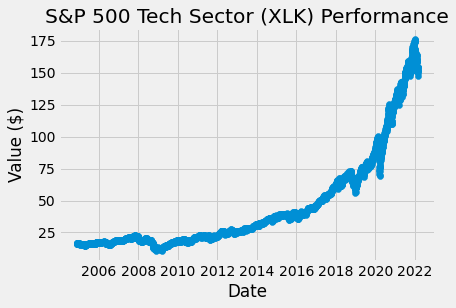

In [ ]:
####Chart Stock 
dates=Combined_Variables['Date']
plt.scatter(dates, y)
plt.title('S&P 500 Tech Sector (XLK) Performance')
plt.ylabel('Value ($)')
plt.xlabel('Date')

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15 , shuffle=False,random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regression = LinearRegression()
regression.fit(train_x, train_y)
print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)

In [ ]:
# the coefficient of determination R² 
regression_confidence = regression.score(test_x, test_y)
print("linear regression confidence: ", regression_confidence)

linear regression confidence:  0.999600420293501


In [ ]:
predicted=regression.predict(test_x)
print(test_x.head())

              Date   VIX_Open  VIX_Close    DIA_Open   DIA_Close  DIA_Volume  \
3694  1.564704e+09  17.690001  17.610001  251.991722  251.611664   5691500.0   
3695  1.564963e+09  19.959999  24.590000  247.982054  244.285950   6608200.0   
3696  1.565050e+09  22.290001  20.170000  245.663659  247.316956   4991000.0   
3697  1.565136e+09  20.700001  19.490000  244.314443  247.269424   5089500.0   
3698  1.565222e+09  19.360001  16.910000  248.428683  250.965622   3637100.0   

        GLD_Open   GLD_Close  GLD_Volume    IWM_Open  ...  XLP_Volume  \
3694  135.389999  135.889999  13753200.0  148.704212  ...    24368700   
3695  137.929993  137.789993  17519800.0  145.242370  ...    26364800   
3696  138.330002  138.910004   9471200.0  144.388982  ...    20126400   
3697  141.279999  141.020004  26671100.0  143.438700  ...    17550800   
3698  140.899994  141.729996  13108600.0  145.601138  ...    24011300   

       XLU_Open  XLU_Close  XLU_Volume   XLV_Open  XLV_Close  XLV_Volume  \
3694

In [ ]:
predicted.shape

(653,)

In [ ]:
dfr=pd.DataFrame({'Actual_Price':test_y, 'Predicted_Price':predicted})
dfr

,Actual_Price,Predicted_Price
0,76.986191,77.133727
1,73.772331,73.827809
2,74.999451,75.164879
3,75.466919,75.332841
4,77.317299,77.310501
...,...,...
648,154.070007,152.997017
649,150.990005,150.413219
650,154.259995,152.435818
651,152.419998,151.464935


In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, predicted))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, predicted))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, predicted)))

Mean Absolute Error (MAE): 0.4222205264062218
Mean Squared Error (MSE) : 0.35667632418232975
Root Mean Squared Error (RMSE): 0.5972238476336404


In [ ]:
x2 = dfr.Actual_Price.mean()
y2 = dfr.Predicted_Price.mean()
Accuracy1 = x2/y2*100
print("The accuracy of the model is " , Accuracy1)

The accuracy of the model is  100.28525130830192


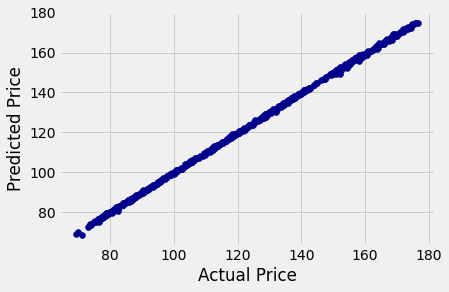

In [ ]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price,  color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

No handles with labels found to put in legend.


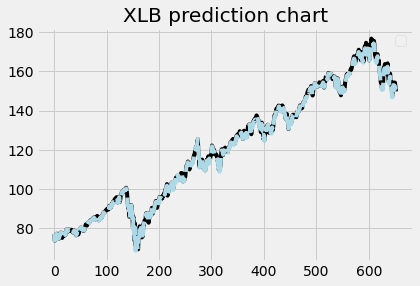

In [ ]:
# plt.plot(dfr.Actual_Price, color='black')
plt.plot(dfr.Actual_Price, color='black')
plt.plot(dfr.Predicted_Price, color='lightblue', linestyle='dashed')
plt.title("XLB prediction chart")
plt.legend();

This cell shows that the model was able to predict the value of the XLB sector with over 99% accuracy. 

Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()

In [ ]:
Datedf=pd.to_datetime(Combined_Variables.Date)



In [ ]:
#Convert the pandas series into numpy array, we need to further 
#massage it before sending it to regression model
yp = np.asarray(y)
# Xp = np.asarray(Combined_Variables['Date'])

Xp = np.asarray(df.index.values)



In [ ]:
#Convert dimension x in the higher degree polynomial expression
X_transform = poly.fit_transform(Xp.reshape(-1, 1))

In [ ]:
##Fit the model 
poly_reg_model.fit(X_transform, yp.reshape(-1, 1))
y_learned = poly_reg_model.predict(X_transform)

In [ ]:
#Now, add future dates to the date index and pass that index to 
#the regression model for future prediction.
#As we have converted date index into a range index, hence, here we 
#just need to add 4347 trading days ( roughly 18 yrs to 2040)
#to the previous index. x[-1] gives the last value of the series.

newindex =  np.asarray(pd.RangeIndex(start=Xp[-1], stop=Xp[-1] + 4347))

In [ ]:
#Convert the extended dimension x in the higher degree polynomial expression
X_extended_transform = poly.fit_transform(newindex.reshape(-1, 1))

In [ ]:
#Prediction for future dates. Let's call it predicted values.
y_predict = poly_reg_model.predict(X_extended_transform)

In [ ]:
#Convert the days index back to dates index for plotting the graph
# Xp = pd.to_datetime(df.index, origin='2004-04-03', unit='D')
# Xp = pd.to_datetime(Datedf.index, origin='2004-11-18', unit='d')
# future_x = pd.to_datetime(newindex, origin='2022-03-05', unit='d')
Xp = pd.to_datetime(df.index, origin='2004-11-18', unit='d')
future_x = pd.to_datetime(newindex, origin='2004-11-18', unit='d')
print(len(Xp))
print(len(future_x))

4347
4347


In [ ]:
#Prediction for future dates. Let's call it predicted values.
y_predict = poly_reg_model.predict(X_extended_transform)

In [ ]:
#Print the last predicted value
print ("Closing price at 2040 would be around ", y_predict[-1])

Closing price at 2040 would be around  [729.7812512]


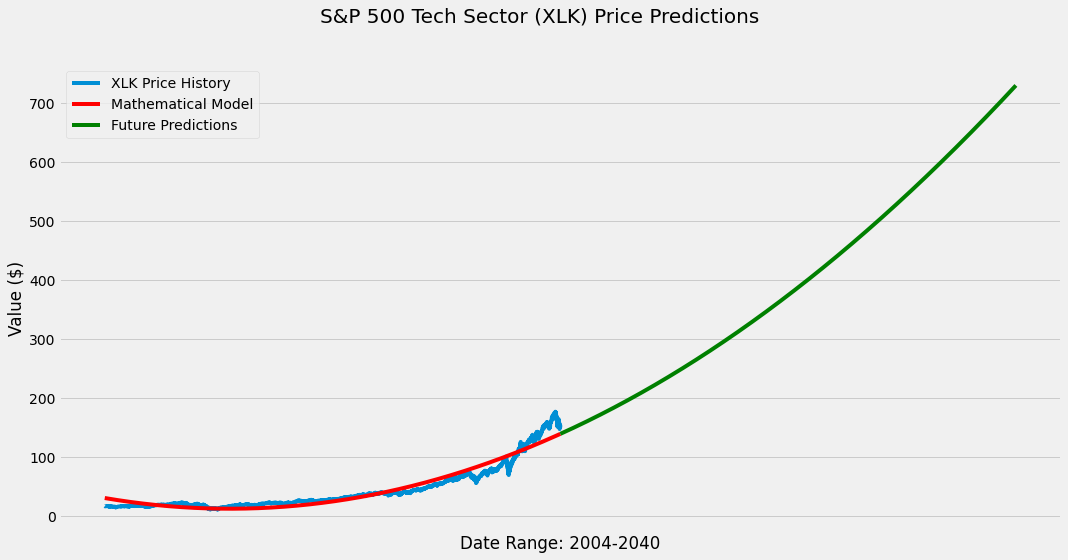

In [ ]:
#Setting figure size
from matplotlib.pylab import rcParams


rcParams['figure.figsize'] = 20,10
#Plot the actual data
plt.figure(figsize=(16,8))
plt.plot(Xp,y , label='XLK Price History')

#Plot the regression model
plt.plot(Xp,y_learned, color='r', label='Mathematical Model')

#Plot the future predictions
plt.plot(future_x,y_predict, color='g', label='Future Predictions')

#Set the title of the graph
plt.suptitle('S&P 500 Tech Sector (XLK) Price Predictions ', fontsize=20)


#Set the title of the graph window
# fig = plt.gcf()
# fig.canvas.set_window_title(3,5,'S&P 500 Materials Sector (XLB) Price Predictions')

## Get rid of the wrong X Labels
plt.gca().set_xticks([])
plt.xticks([])

##Label Y & X Value
plt.ylabel('Value ($)')
plt.xlabel('Date Range: 2004-2040')

#display the legends
plt.legend()
#display the graph
plt.show()